# Avaliando o melhor modelo de regressão 

Variáveis não categoticas: São varias variáveis que influenciam o preço.

Nosso desafio de hoje será tentar encontrar uma forma de criar um algoritmo preditivo que utilize essas caracteristicas para predizer o valor do imóvel.

**Atributos**

- Ordem: Coluna de ID
- Valor: Valor do imóvel
- Area: Tamanho da área do imóvel
- IA: Idade do imóvel
- Andar: Quantidade de andares
- Suites: Quantidade de suítes
- Vista: Se o imóvel possuí uma boa vista ou não
- DistBM: Distância do imóvel do mar
- SemRuido: Se o imóvel é localizado em uma região calma ou não
- AV100m: Distante/próximo à área verde.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

In [3]:
imoveis = pd.read_csv("Valorizacao_Ambiental.csv", sep=";")

In [4]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [5]:
imoveis.shape

(172, 10)

In [6]:
imoveis.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [7]:
imoveis.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


Identificando a variavel target

Text(0.5, 1.0, 'Histograma da variável valor')

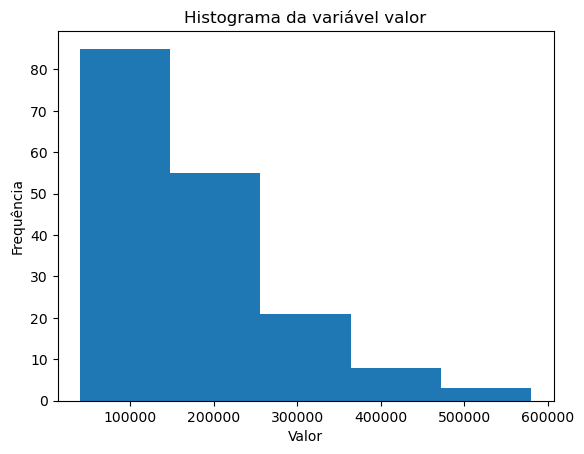

In [8]:
plt.hist(imoveis["Valor"], bins=5)

plt.ylabel("Frequência")
plt.xlabel("Valor")

plt.title("Histograma da variável valor")

In [9]:
imoveis["raiz_valor"] = np.sqrt(imoveis["Valor"])

In [10]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


Text(0.5, 1.0, 'Histograma da variável valor após raiz quadrada aplicada')

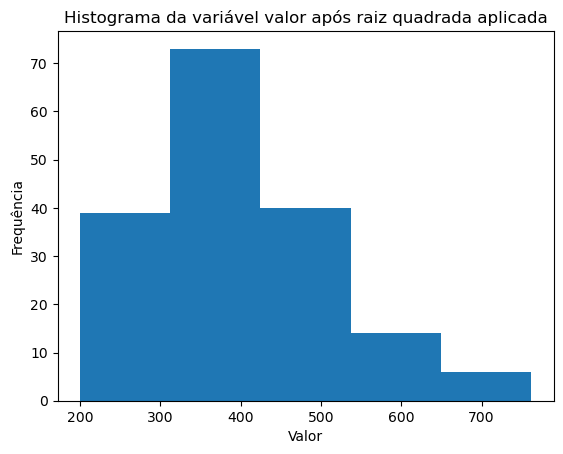

In [11]:
plt.hist(imoveis["raiz_valor"], bins=5)

plt.ylabel("Frequência")
plt.xlabel("Valor")

plt.title("Histograma da variável valor após raiz quadrada aplicada")

Text(0, 0.5, 'Qtd de suites')

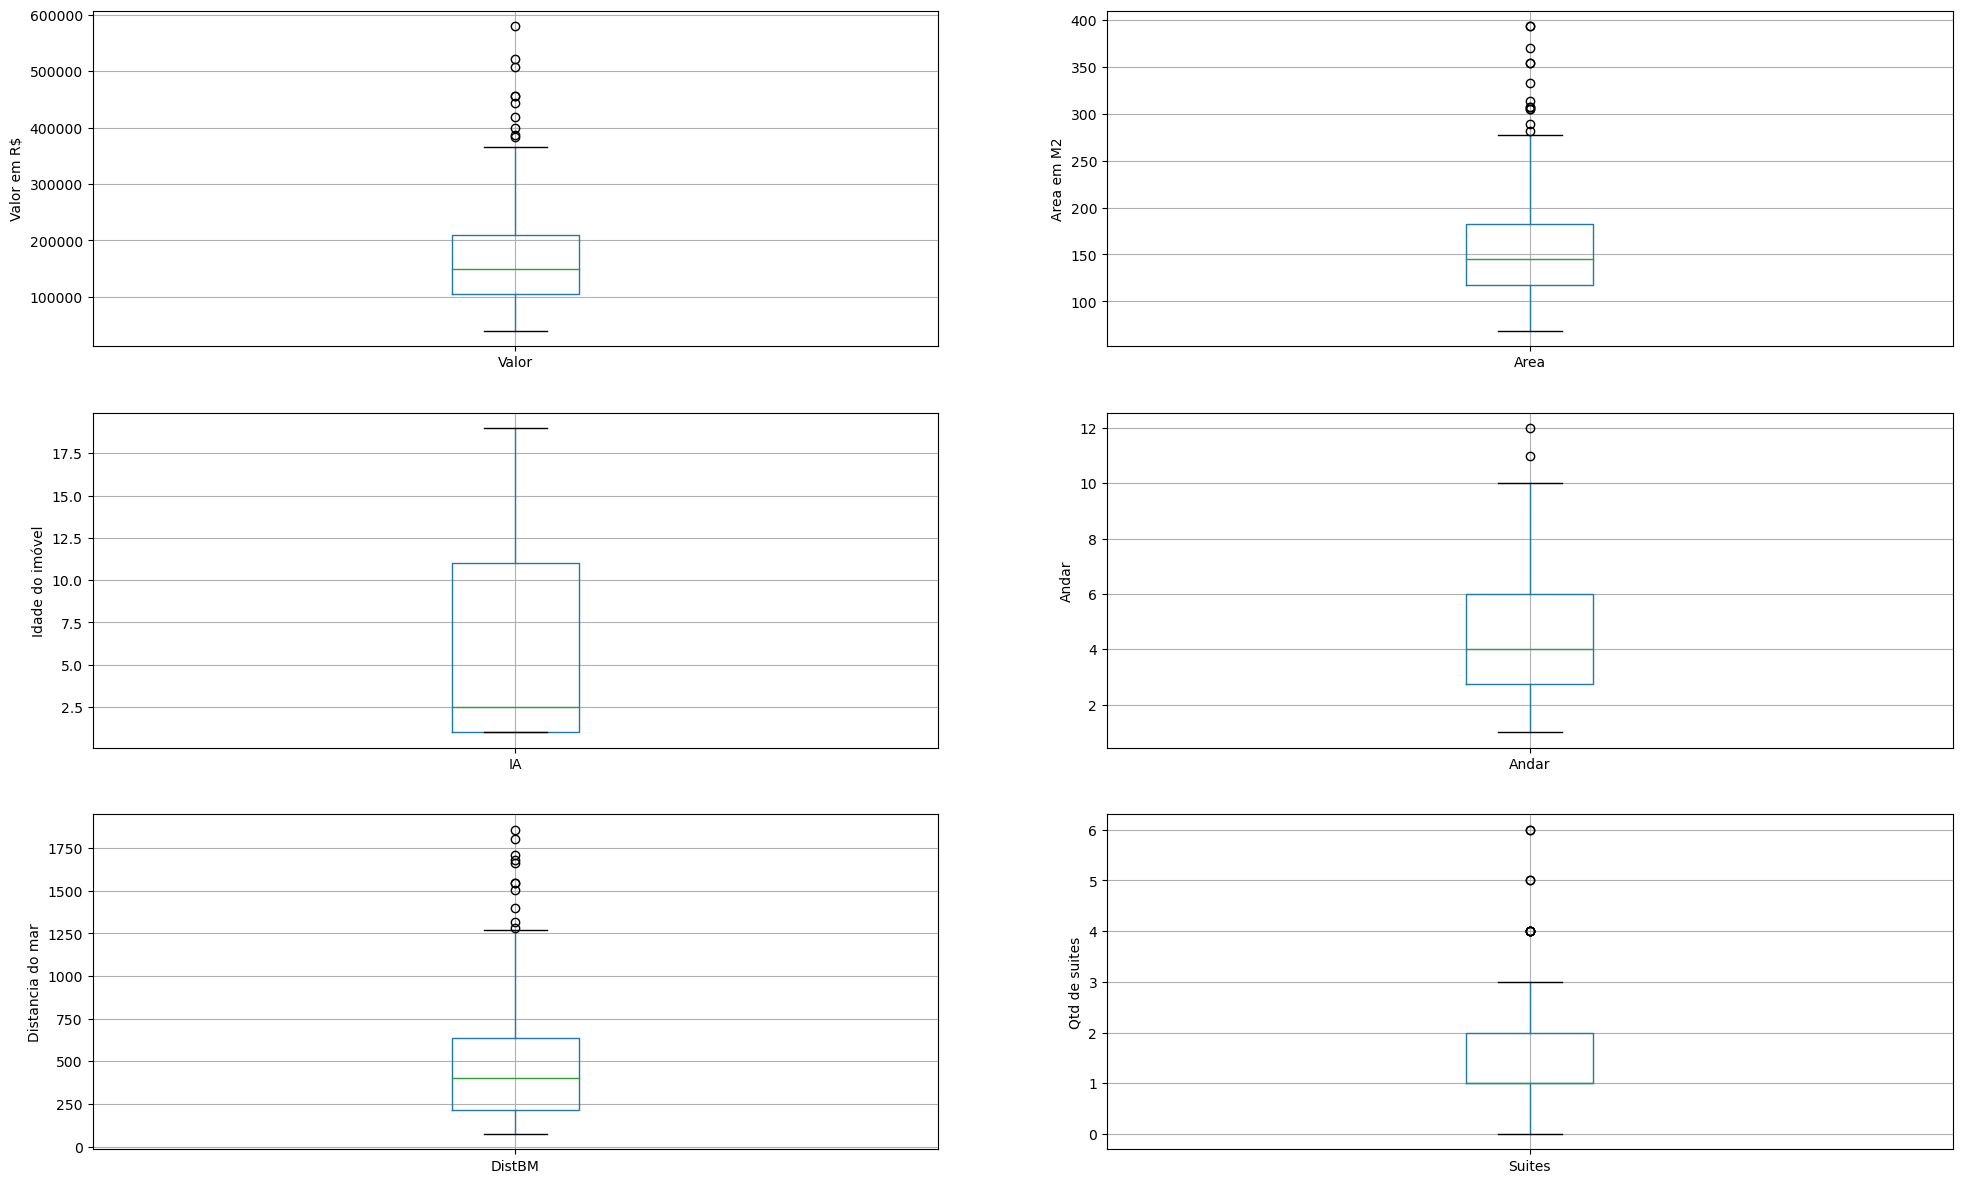

In [13]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = imoveis.boxplot(column = "Valor")
fig.set_title("")
fig.set_ylabel("Valor em R$")

plt.subplot(4, 2, 2)
fig = imoveis.boxplot(column = "Area")
fig.set_title("")
fig.set_ylabel("Area em M2")

plt.subplot(4, 2, 3)
fig = imoveis.boxplot(column = "IA")
fig.set_title("")
fig.set_ylabel("Idade do imóvel")

plt.subplot(4, 2, 4)
fig = imoveis.boxplot(column = "Andar")
fig.set_title("")
fig.set_ylabel("Andar")

plt.subplot(4, 2, 5)
fig = imoveis.boxplot(column = "DistBM")
fig.set_title("")
fig.set_ylabel("Distancia do mar")

plt.subplot(4, 2, 6)
fig = imoveis.boxplot(column = "Suites")
fig.set_title("")
fig.set_ylabel("Qtd de suites")

' A correlação dos dados, quanto mais próximo de um, significa que nossas variaveis que conversam e as negativas, são variaveis que tem comportamento oposto. Correlação de pearson'

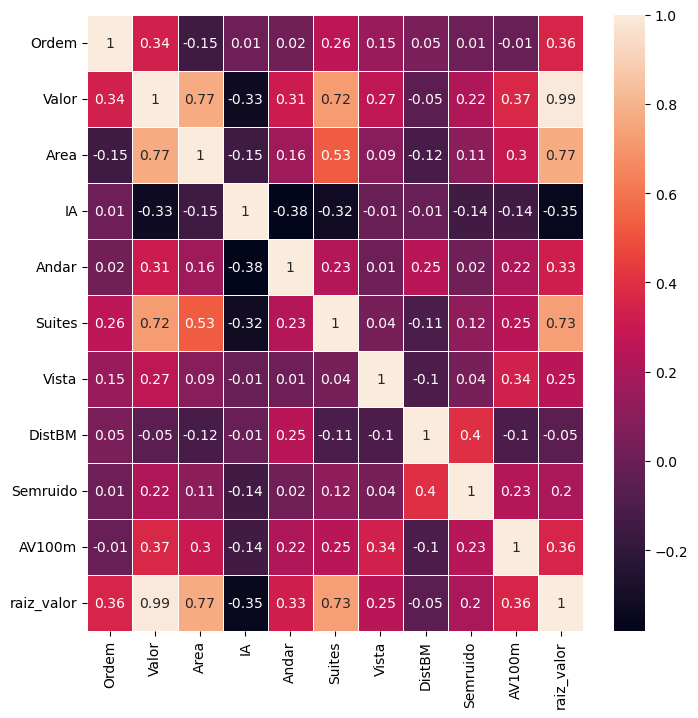

In [16]:
correlation_matrix = imoveis.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

""" A correlação dos dados, quanto mais próximo de um, significa que nossas variaveis que conversam e as negativas, são variaveis que tem comportamento oposto. Correlação de pearson"""

Text(0.5, 1.0, 'Area do imóvel x Valor')

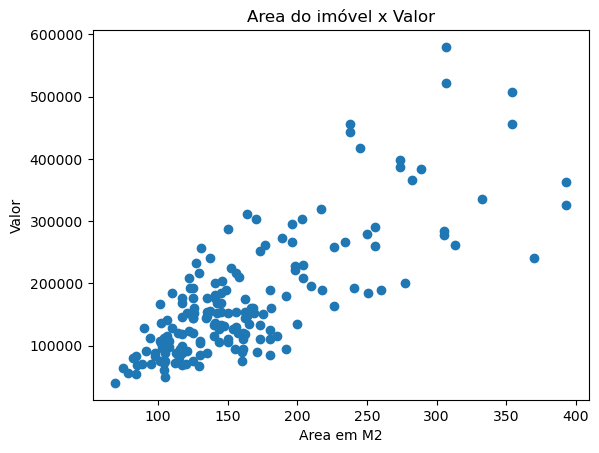

In [20]:
plt.scatter("Area", "Valor", data=imoveis)
plt.xlabel("Area em M2")
plt.ylabel("Valor")
plt.title("Area do imóvel x Valor")

"""funciona: eu consigo visualizar uma reta"""

'Não funciona, eu não vejo um padrão'

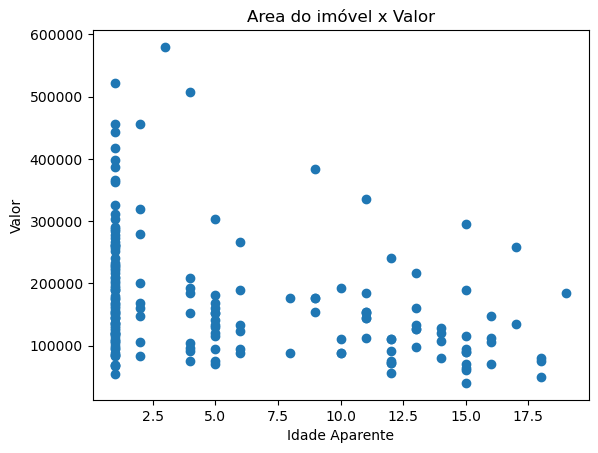

In [22]:
plt.scatter("IA", "Valor", data=imoveis)
plt.xlabel("Idade Aparente")
plt.ylabel("Valor")
plt.title("Area do imóvel x Valor")

"""Não funciona, eu não vejo um padrão"""

In [23]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


<Axes: xlabel='Vista', ylabel='Valor'>

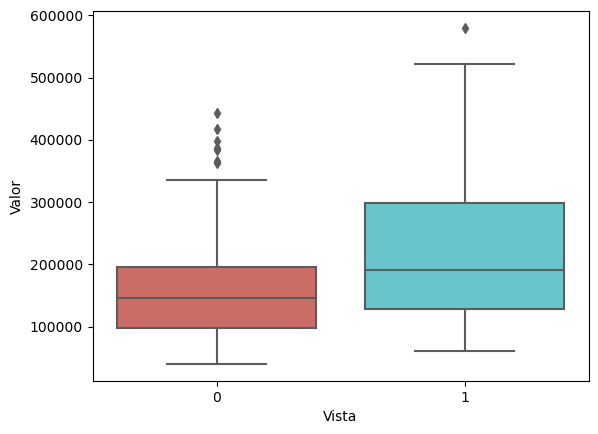

In [24]:
sb.boxplot(x="Vista", y="Valor", data=imoveis, palette="hls")



<Axes: xlabel='Semruido', ylabel='Valor'>

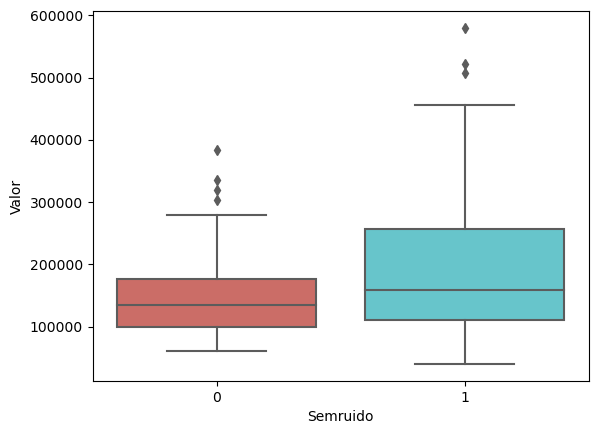

In [25]:
sb.boxplot(x="Semruido", y="Valor", data=imoveis, palette="hls")


## Escolhendo o melhor modelo de regressão

O próximo passo é a construção de modelos preditivos de regressão. 
Um modelo de regressão linear é uma técnica estatística usada para modelar o relacionamento entre uma variável dependente contínua e uma ou mais variáveis independentes. A regressão linear assume que existe uma ralação linear entre as variáveis envolvidas, ou seja, a relação pode ser aproximada por uma linha reta. 

In [29]:
# Regressão linear Múltipla

from sklearn.linear_model import LinearRegression

In [30]:
# Criando um objeto de Regressão linear 
lr = LinearRegression()

In [31]:
# X contem as variáveis preditoras ou independentes
X = imoveis[['Area', 'Suites', 'IA', 'Semruido', 'Vista', 'Andar', 'AV100m', 'DistBM']]

# y variável target ou dependente
y = imoveis[['Valor']]

In [34]:
from sklearn.model_selection import train_test_split

# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [35]:
#Treinando o modelo 
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
# Calculando o valor predito da variável resposta na amostra teste

y_pred = lr.predict(X_test)

In [44]:
# Primeiro, olhamos o Intercepto e os Coeficientes da regressão. 
# Representa o valor esperado da variável dependente quando todas as variáveis independentes são iguais
# Em termos gráficos, o intercepto é o ponto onde a linha de regrassão cruza o eixo vertical (eixo y)

print("Intercepto:", lr.intercept_)

Intercepto: [-40165.8752773]


In [45]:
# Os coeficientes da regressão linear representam as inclinações da linha de regressão para cada variável

coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,Area,815.218075
1,Suites,34315.785459
2,IA,-1052.417100
3,Semruido,17027.508944
4,Vista,63486.030935
5,Andar,5635.237485
6,AV100m,-5672.535051
7,DistBM,-2.522530


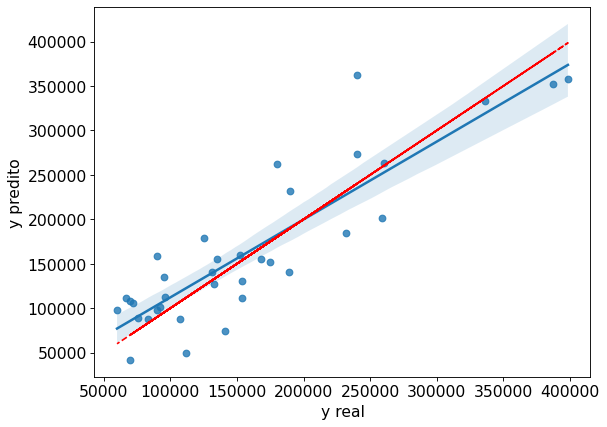

In [46]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 14})
ax = sb.regplot(x = y_test, y = y_pred)
ax.set(xlabel='y real', ylabel='y predito')
ax = plt.plot(y_test, y_test, '--r')

plt.show()

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
# Avaliando o modelo 
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE',MAE) # Mean Absolute Error (MAE) É A MÉDIA DO VALOR ABSOLUTO DOS ERROS.
print('MSE', MSE) # eRRO qUADRÁTICO mÉDIO (MSE) É A MÉDIA DOS ERROS QUADRÁTICOS
print('r²', r2) # (R-quadrado)

MAE 34422.98857094557
MSE 1844288772.1789756
r² 0.7584591969125047


## Avaliando com DecisionTreeRegressor

Observamos que nosso modelo de regressão linear se comportou bem, mas e se tentarmos criar um novo modelo sob um outro tipo de algoritmo diferente ?

Um modelo de DecisionTreeRegressor é um modelo de árvore de decisão utilizado para resolver problemas de regressão. esse tipo de técnica cria uma estrutura em forma de árvore para mapear relações não lineares entre as variáveis preditoras e a variável alvo. 

teste: 

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
# Criando o modelo de DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=101)

In [51]:
y_pred_model_dtr = model_dtr.predict(X_test)

In [53]:
# Avaliando o modelo 
MAE = mean_absolute_error(y_test, y_pred_model_dtr)
MSE = mean_squared_error(y_test, y_pred_model_dtr)
r2 = r2_score(y_test, y_pred_model_dtr)
print('MAE',MAE) # Mean Absolute Error (MAE) É A MÉDIA DO VALOR ABSOLUTO DOS ERROS.
print('MSE',MSE) # eRRO qUADRÁTICO mÉDIO (MSE) É A MÉDIA DOS ERROS QUADRÁTICOS
print('r²',r2)  # (R-quadrado)

MAE 44913.75102040816
MSE 3223969337.3848395
r² 0.577766695417574


## Avaliando com SVR
Vamos agora testar um outro tipo de algoritmo para analisar a performance, o Support Vector Regression. O SVR, é usado para tarefas de regressão, em que a tarefa é prever um valor contínuo em vez de uma classe

In [54]:
from sklearn.svm import SVR

In [56]:
# Criando o modelo em SVM
svr = SVR(kernel='linear')


In [57]:
svr.fit(X_train, y_train)

C:\Users\lanam\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [58]:
y_pred_svr = svr.predict(X_test)

In [61]:
# Avaliando o modelo 
MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
print('MAE',MAE) # Mean Absolute Error (MAE) É A MÉDIA DO VALOR ABSOLUTO DOS ERROS.
print('MSE',MSE) # eRRO qUADRÁTICO mÉDIO (MSE) É A MÉDIA DOS ERROS QUADRÁTICOS
print('r²',r2)  # (R-quadrado)

MAE 43153.53918496288
MSE 3123421996.7782364
r² 0.5909350700044546
